In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [65]:
sales = pd.read_excel('./Relatas_ML_Assignment/sales-pipeline.xlsx')
sales_conf = pd.read_excel('./Relatas_ML_Assignment/sales-pipeline.xlsx')

In [66]:
sentiment = pd.read_excel('sentiment.xlsx')
sentiment_conf = pd.read_excel('sentiment.xlsx')

In [67]:
sentiment['InteractionDate'] = pd.to_datetime(sentiment['InteractionDate'])
sentiment_conf['InteractionDate'] = pd.to_datetime(sentiment_conf['InteractionDate'])

grouped = sentiment.set_index(['InteractionDate'])
goruped_conf = sentiment_conf.set_index(['InteractionDate'])

grouped.loc[grouped.sentiment == 'POSITIVE', 'positive'] = 1
grouped['positive'] = grouped['positive'].fillna(0)
grouped.loc[grouped.sentiment == 'NEGATIVE', 'negative'] = 1
grouped['negative'] = grouped['negative'].fillna(0)

goruped_conf.loc[(goruped_conf.sentiment == 'POSITIVE') &  (goruped_conf.conf>=0.95) , 'positive'] = 1
goruped_conf.loc[(goruped_conf.sentiment == 'NEGATIVE') &  (goruped_conf.conf>=0.95) , 'negative'] = 1
goruped_conf['positive'] = goruped_conf['positive'].fillna(0)
goruped_conf['negative'] = goruped_conf['negative'].fillna(0)

In [68]:
grouped.loc['2016-01-04 00:00:00':'2016-01-31 00:00:00'].query('positive == 1')['positive'].sum()

1722.0

In [69]:
for index,rows in sales.iterrows():
    a = rows['ContactEmailID']
    sales.loc[index,'postive']  = grouped.loc[rows['Created Date']:rows['Close Date']].query('positive == 1 and toEmailId==@a')['positive'].sum()
    sales.loc[index,'negative']  = grouped.loc[rows['Created Date']:rows['Close Date']].query('negative == 1 and toEmailId==@a')['negative'].sum()

In [70]:
for index,rows in sales_conf.iterrows():
    a = rows['ContactEmailID']
    sales_conf.loc[index,'postive']  = goruped_conf.loc[rows['Created Date']:rows['Close Date']].query('positive == 1 and toEmailId==@a')['positive'].sum()
    sales_conf.loc[index,'negative']  = goruped_conf.loc[rows['Created Date']:rows['Close Date']].query('negative == 1 and toEmailId==@a')['negative'].sum()
sales_conf['sum']  = sales_conf['postive'] + sales_conf['negative']
sales['sum'] = sales['postive'] + sales['negative']
sales_conf['diff']  = sales_conf['postive'] - sales_conf['negative']
sales['diff'] = sales['postive'] - sales['negative']
sales_conf.rename(columns={"Close Date":"Close_Date"} ,inplace=True)

In [71]:
sales.query('Deal_Stage == "Lost"')['postive'].sum()/sales.query('Deal_Stage == "Lost"')['negative'].sum()


1.027850321449068

In [72]:
sales_conf.query('Deal_Stage == "Won"')['postive'].sum()/sales_conf.query('Deal_Stage == "Won"')['negative'].sum()


1.0887095654491987

In [10]:
sales.postive.sum()/sales.negative.sum()

1.0293673305939512

In [11]:
sales_conf.postive.sum()/sales_conf.negative.sum()

1.088785267144195

In [12]:
sales_conf.corr(method="pearson"),sales.corr()

(             Close_Value  DateDiff   postive  negative       sum
 Close_Value     1.000000  0.018414  0.013732  0.012918  0.013369
 DateDiff        0.018414  1.000000  0.876297  0.870481  0.875360
 postive         0.013732  0.876297  1.000000  0.991487  0.998026
 negative        0.012918  0.870481  0.991487  1.000000  0.997707
 sum             0.013369  0.875360  0.998026  0.997707  1.000000,
              Close_Value  DateDiff   postive  negative       sum
 Close_Value     1.000000  0.018414  0.013760  0.013773  0.013790
 DateDiff        0.018414  1.000000  0.878027  0.867824  0.874440
 postive         0.013760  0.878027  1.000000  0.993235  0.998330
 negative        0.013773  0.867824  0.993235  1.000000  0.998285
 sum             0.013790  0.874440  0.998330  0.998285  1.000000)

In [13]:
scaler = MinMaxScaler()

#sales_conf[['Close_Value', 'postive', 'negative','sum']] = scaler.fit_transform(sales_conf[['Close_Value', 'postive', 'negative','sum']])
#sales[['Close_Value', 'postive', 'negative','sum']] = scaler.fit_transform(sales[['Close_Value', 'postive', 'negative','sum']])

(<AxesSubplot:xlabel='Close Date'>,
 <AxesSubplot:xlabel='Close Date'>,
 <AxesSubplot:xlabel='Close Date'>,
 <AxesSubplot:xlabel='Close Date'>)

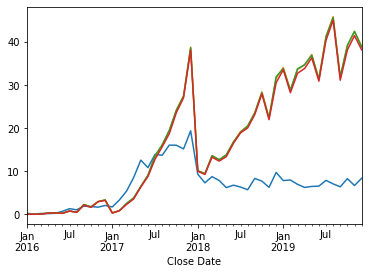

In [14]:
sales_conf.query('Deal_Stage == "Won"').set_index('Close Date').resample('M')['Close_Value'].sum().plot(),sales_conf.query('Deal_Stage == "Won"').set_index('Close Date').resample('M')['sum'].sum().plot(),sales_conf.query('Deal_Stage == "Won"').set_index('Close Date').resample('M')['postive'].sum().plot(),sales_conf.query('Deal_Stage == "Won"').set_index('Close Date').resample('M')['negative'].sum().plot(label='negative')

(<AxesSubplot:xlabel='Close Date'>, <AxesSubplot:xlabel='Close Date'>)

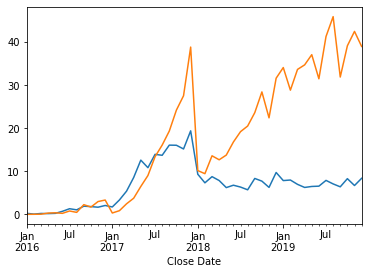

In [15]:
sales_conf.query('Deal_Stage == "Won"').set_index('Close Date').resample('M')['Close_Value'].sum().plot(label='value'),sales_conf.query('Deal_Stage == "Won"').set_index('Close Date').resample('M')['sum'].sum().plot(label='sum')

(<AxesSubplot:xlabel='Close Date'>, <AxesSubplot:xlabel='Close Date'>)

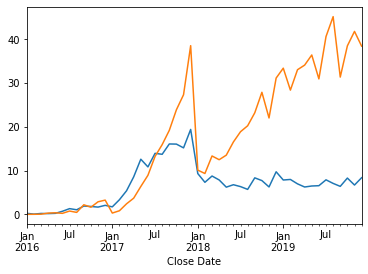

In [16]:
sales.query('Deal_Stage == "Won"').set_index('Close Date').resample('M')['Close_Value'].sum().plot(label='value'),sales.query('Deal_Stage == "Won"').set_index('Close Date').resample('M')['sum'].sum().plot(label='sum')

(<AxesSubplot:xlabel='Close_Date'>, <AxesSubplot:xlabel='Close_Date'>)

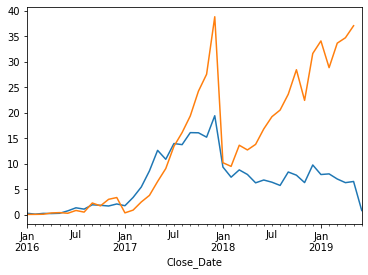

In [47]:
sales_conf.rename(columns={"Close Date":"Close_Date"} ,inplace=True)

sales_conf.query('Deal_Stage == "Won" and Close_Date <= "20190601" ').set_index('Close_Date').resample('M')['Close_Value'].sum().plot(),sales_conf.query('Deal_Stage == "Won" and Close_Date < "20190601" ').set_index('Close_Date').resample('M')['sum'].sum().plot()

In [30]:
sales_conf.query('Deal_Stage == "Won" and Close_Date <= "20190601" ').set_index('Close Date').resample('M')['Close_Value'].sum().plot(),

0      2016-05-24
1      2016-11-02
2      2016-12-07
3      2016-09-11
4      2016-09-18
          ...    
8795   2019-07-22
8796   2019-05-26
8797   2019-04-15
8798   2019-05-16
8799   2019-08-01
Name: Close_Date, Length: 8800, dtype: datetime64[ns]

In [33]:
sales

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,postive,negative,sum
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,0.040231,2016-01-04,2016-05-24,141,0.169269,0.147528,0.158236
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,0.000231,2016-01-04,2016-11-02,303,0.201315,0.172249,0.186564
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,0.033587,2016-01-06,2016-12-07,336,0.180772,0.181818,0.181303
3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,0.033587,2016-01-06,2016-09-11,249,0.148726,0.144338,0.146499
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,0.015835,2016-01-06,2016-09-18,256,0.106820,0.106061,0.106435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,Vehement Capital Partners,2BD1SDBX,Jonathan Berthelot,jonathan@piedpiper.com,lavonia@vehementcapitalpartners.com,In Progress,GTX Basic,0.018248,2018-12-30,2019-07-22,204,0.110107,0.082137,0.095913
8796,Hottechi,F1NWH30L,Marty Freudenburg,marty@piedpiper.com,juliette@hottechi.com,In Progress,MG Advanced,0.107306,2018-12-30,2019-05-26,147,0.171734,0.185805,0.178875
8797,Umbrella Corporation,6KHIXTAD,Anna Snelling,anna@piedpiper.com,orpha@umbrellacorporation.com,In Progress,GTX Plus Pro,0.008661,2018-12-31,2019-04-15,105,0.067379,0.051834,0.059490
8798,Rundofase,BUOI3TBI,Gladys Colclough,gladys@piedpiper.com,crista@rundofase.com,In Progress,MG Special,0.107306,2018-12-31,2019-05-16,136,0.098603,0.093301,0.095913


<AxesSubplot:xlabel='Close_Date'>

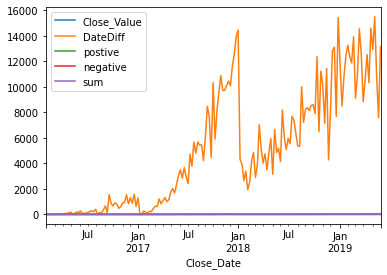

In [51]:
sales_conf.query('Deal_Stage == "Won" and Close_Date <= "20190601" ').resample('W-Mon', on='Close_Date').sum().reset_index().sort_values(by='Close_Date').set_index('Close_Date').plot()

<AxesSubplot:xlabel='Close_Date'>

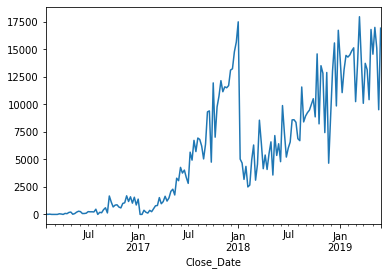

In [86]:
sales_conf.query('Deal_Stage == "Won" and Close_Date <= "20190601"').resample('W-Mon', on='Close_Date').sum().reset_index().sort_values(by='Close_Date').set_index('Close_Date')['sum'].plot()

<AxesSubplot:xlabel='Close_Date'>

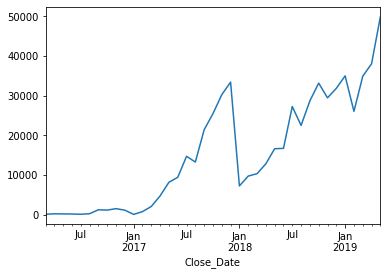

In [82]:
sales_conf.query('Deal_Stage == "Lost" and Close_Date < "20190601"').set_index('Close_Date').resample('M')['sum'].sum().plot()

In [78]:
sales_conf.corr(method = 'pearson')

,Close_Value,DateDiff,postive,negative,sum,diff
Close_Value,1.000000,0.018414,0.013732,0.012918,0.013369,0.012033
DateDiff,0.018414,1.000000,0.876297,0.870481,0.875360,0.472273
postive,0.013732,0.876297,1.000000,0.991487,0.998026,0.550971
negative,0.012918,0.870481,0.991487,1.000000,0.997707,0.437621
sum,0.013369,0.875360,0.998026,0.997707,1.000000,0.497467
diff,0.012033,0.472273,0.550971,0.437621,0.497467,1.000000


<AxesSubplot:xlabel='Close_Date'>

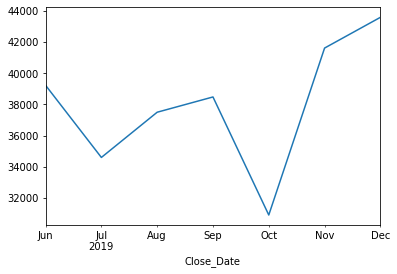

In [94]:
sales_conf.query('Deal_Stage == "In Progress" and Close_Date > "20190601"').set_index('Close_Date').resample('M')['sum'].sum().plot()

In [88]:
sales_conf

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close_Date,DateDiff,postive,negative,sum,diff
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,156.0,134.0,290.0,22.0
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303,194.0,165.0,359.0,29.0
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336,162.0,172.0,334.0,-10.0
3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249,149.0,124.0,273.0,25.0
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256,93.0,96.0,189.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,Vehement Capital Partners,2BD1SDBX,Jonathan Berthelot,jonathan@piedpiper.com,lavonia@vehementcapitalpartners.com,In Progress,GTX Basic,590,2018-12-30,2019-07-22,204,94.0,71.0,165.0,23.0
8796,Hottechi,F1NWH30L,Marty Freudenburg,marty@piedpiper.com,juliette@hottechi.com,In Progress,MG Advanced,3284,2018-12-30,2019-05-26,147,161.0,154.0,315.0,7.0
8797,Umbrella Corporation,6KHIXTAD,Anna Snelling,anna@piedpiper.com,orpha@umbrellacorporation.com,In Progress,GTX Plus Pro,300,2018-12-31,2019-04-15,105,67.0,40.0,107.0,27.0
8798,Rundofase,BUOI3TBI,Gladys Colclough,gladys@piedpiper.com,crista@rundofase.com,In Progress,MG Special,3284,2018-12-31,2019-05-16,136,89.0,91.0,180.0,-2.0


In [104]:
X = sales_conf.query( 'Deal_Stage == "Won" or Deal_Stage == "Lost"' )['diff'].values.reshape(-1,1)
Y = sales_conf.query( 'Deal_Stage == "Won" or Deal_Stage == "Lost" ')['Deal_Stage'].values.reshape(-1,1)

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [106]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/home/ai/.virtualenvs/face_deep/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

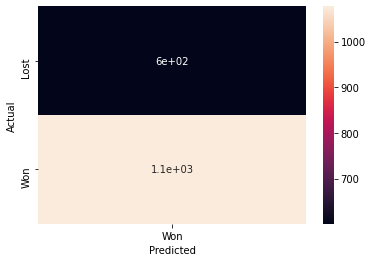

In [112]:
confusion_matrix = pd.crosstab(y_test.reshape(-1), y_pred.reshape(-1), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [113]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.6418355184743743


In [128]:
sales_conf

(6711, 1)

In [131]:
sales_conf.query( 'Deal_Stage == "Won"' ).count()

Account              4238
Opportunity_ID       4238
Sales_Agent          4238
SalesAgentEmailID    4238
ContactEmailID       4238
Deal_Stage           4238
Product              4238
Close_Value          4238
Created Date         4238
Close_Date           4238
DateDiff             4238
postive              4238
negative             4238
sum                  4238
diff                 4238
dtype: int64